In [80]:
# We need to install a wide variety of libraries. For this we will install pandas, numpy, seaborn and matplotlib libraries.

import numpy as np
import pandas as pd
import seaborn as sns
sns.set()

import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings("ignore")

# Graphics in retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina'


In [81]:
data = pd.read_csv('../input/students-performance-in-exams/StudentsPerformance.csv')

In [82]:
data.head() # see first 5 rows

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Here is the description of our features:

|  Name  | Value Type | Statistical Type |
|---         |---       |--- 
| **gender** | String | Categorical/Binary |
| **race/ethnicity** |String | Categorical/Ordinal |
| **parental level of education** |String | Categorical/Ordinal |
| **lunch** | String | Categorical/Binary |
| **test preparation course** | String | Categorical/Binary |
| **math score** | Numerical | Quantitative |
| **reading score** | Numerical | Quantitative |
| **writing score** | Numerical | Quantitative|



In [83]:
# shows the analysis of numerical values.
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [84]:
# showing if any feature has at least one null value
data.isnull().any()

gender                         False
race/ethnicity                 False
parental level of education    False
lunch                          False
test preparation course        False
math score                     False
reading score                  False
writing score                  False
dtype: bool

In [85]:
# count null values
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [86]:
# showing cols names
for col in data.columns:
    print(col)

gender
race/ethnicity
parental level of education
lunch
test preparation course
math score
reading score
writing score


We should rename cols names, just make it as a `title` and `replace spaces with -`

In [87]:
# renaming columns names
data.columns = [col.title().replace(' ','_') for col in data.columns]

# new cols names
for col in data.columns:
    print(col)

Gender
Race/Ethnicity
Parental_Level_Of_Education
Lunch
Test_Preparation_Course
Math_Score
Reading_Score
Writing_Score


We will calculate each student will pass in each exam by make a `passmark` as an indicator of success and categorize each student within all exam by `GPA`

**we will set the minimum marks to `40` to pass in a exam**

In [88]:
passmark = 40

In [89]:
data.describe()

,Math_Score,Reading_Score,Writing_Score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


as we sow less then `25%` of all students get less than the pass mark

**How many students passed in Math exam?**

In [90]:
data['Pass_Math_Exam'] = (data['Math_Score'] > passmark).map({True: "P",
                                                     False: "F"})

data['Pass_Math_Exam'].value_counts()

P    950
F     50
Name: Pass_Math_Exam, dtype: int64

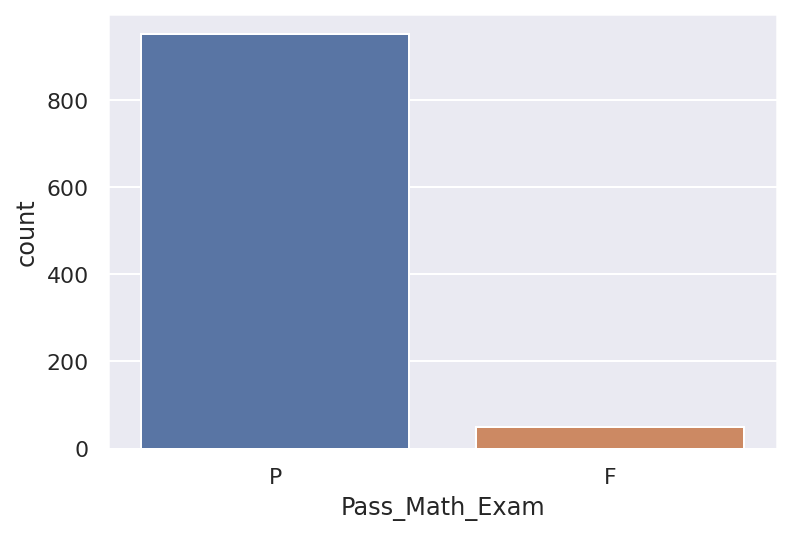

In [91]:
sns.countplot(data=data, x= 'Pass_Math_Exam');


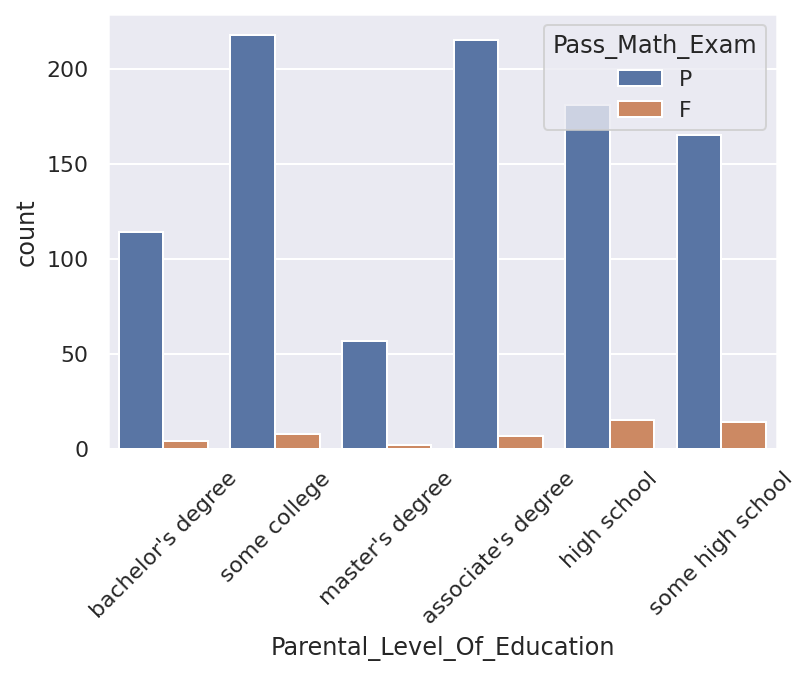

In [92]:
sns.countplot(data=data,x= 'Parental_Level_Of_Education', hue= 'Pass_Math_Exam')
plt.xticks(rotation= 45);


**How many students passed in Reaing exam?**

In [93]:
data['Pass_Reading_Exam'] = (data['Reading_Score'] > passmark).map({True: "P",
                                                     False: "F"})

data['Pass_Reading_Exam'].value_counts()


P    973
F     27
Name: Pass_Reading_Exam, dtype: int64

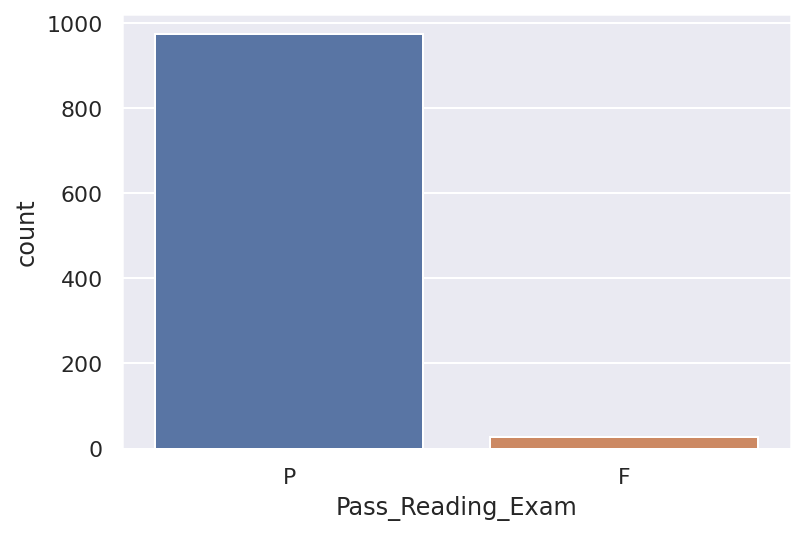

In [94]:
sns.countplot(data=data, x= 'Pass_Reading_Exam');


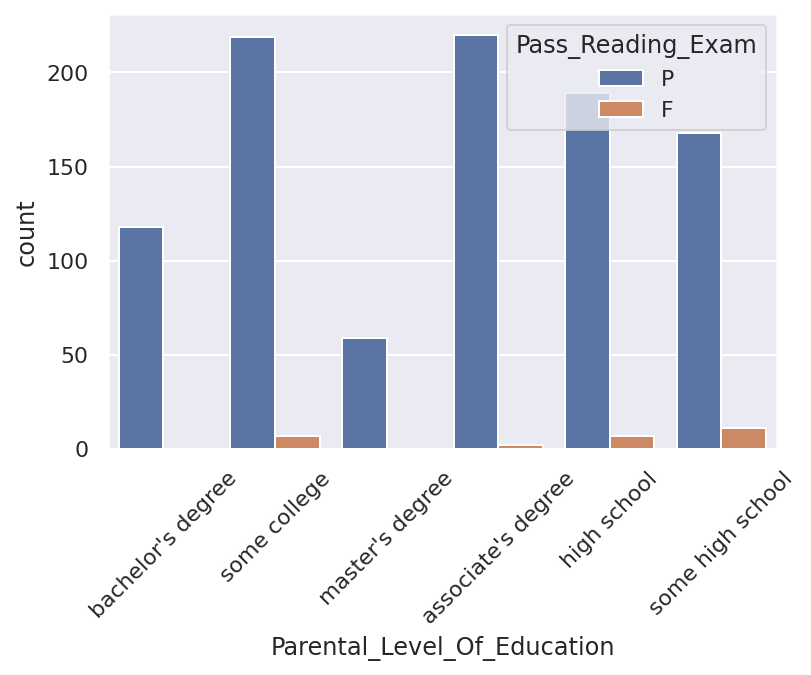

In [95]:
sns.countplot(data=data,x= 'Parental_Level_Of_Education', hue= 'Pass_Reading_Exam')
plt.xticks(rotation= 45);


**How many students passed in Writing exam?**

In [96]:
data['Pass_Writing_Exam'] = (data['Writing_Score'] > passmark).map({True: "P",
                                                     False: "F"})

data['Pass_Writing_Exam'].value_counts()


P    965
F     35
Name: Pass_Writing_Exam, dtype: int64

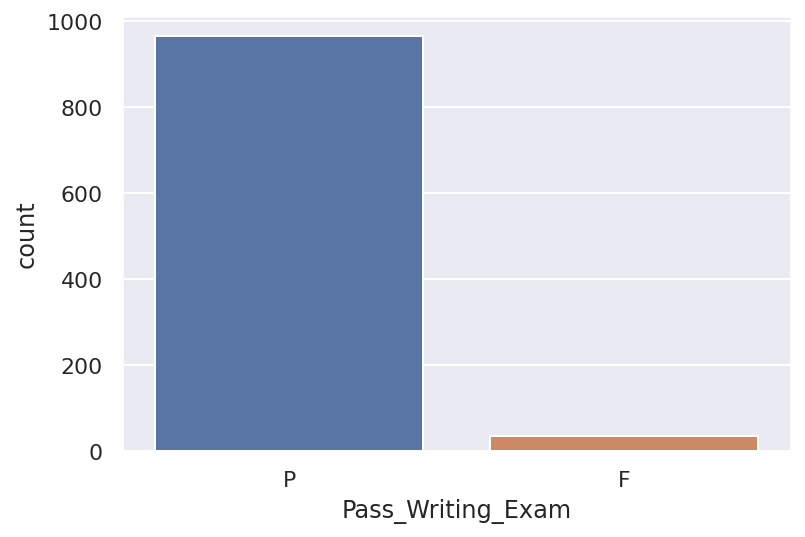

In [97]:
sns.countplot(data=data, x= 'Pass_Writing_Exam');


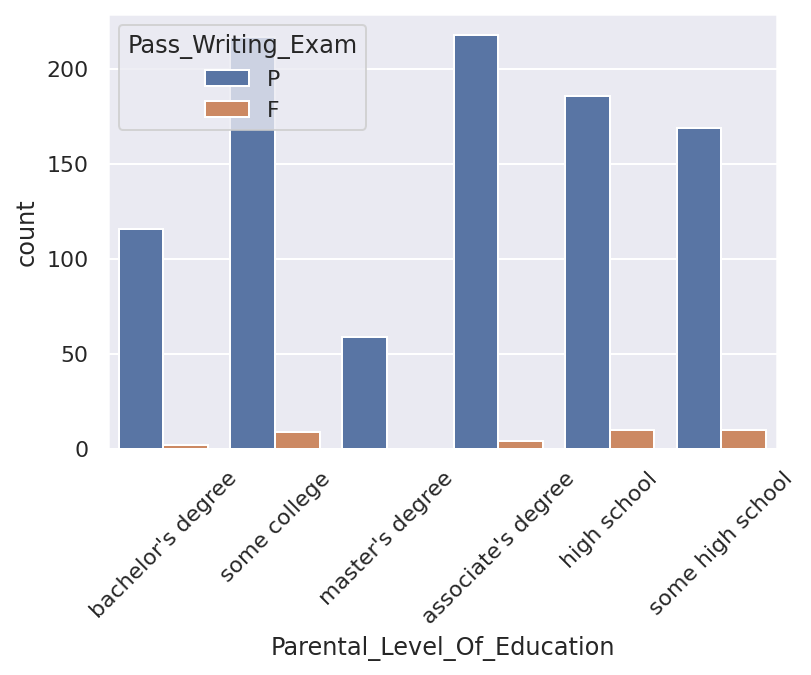

In [98]:
sns.countplot(data=data,x= 'Parental_Level_Of_Education', hue= 'Pass_Writing_Exam')
plt.xticks(rotation= 45);


**How many students pass in all exams?**

In [99]:
data['Overall_Passed'] = data.apply(lambda df:
                                    'P' if df['Pass_Math_Exam'] == 'P' 
                                    or df['Pass_Reading_Exam']  == 'P' 
                                    or df['Pass_Writing_Exam']  == 'P' 
                                    else 'F',
                                    axis=1)
data['Overall_Passed'].value_counts()


P    982
F     18
Name: Overall_Passed, dtype: int64

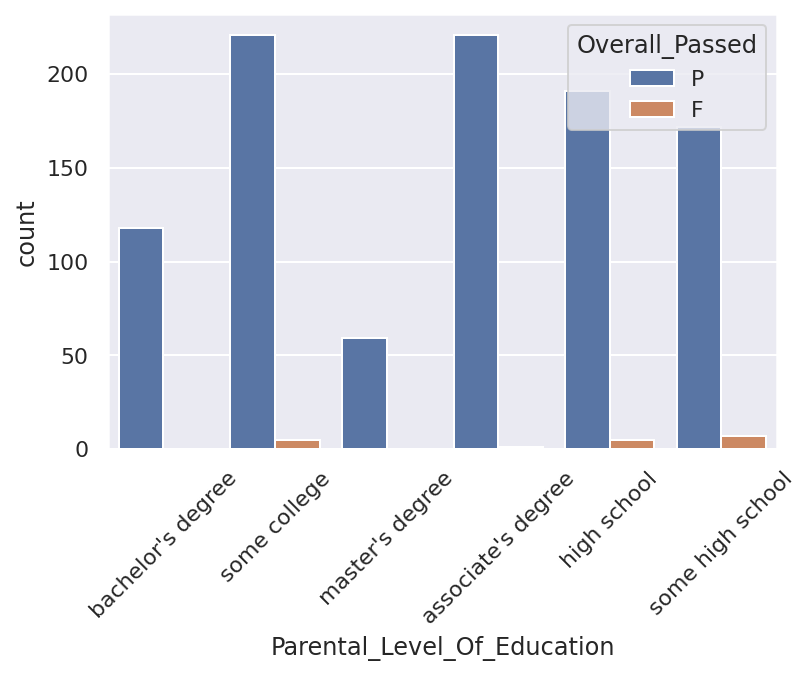

In [100]:
sns.countplot(data= data, hue= 'Overall_Passed',
             x= 'Parental_Level_Of_Education')
plt.xticks(rotation= 45);


In [101]:
pd.crosstab(data['Parental_Level_Of_Education'], data['Overall_Passed']).T

Parental_Level_Of_Education,associate's degree,bachelor's degree,high school,master's degree,some college,some high school
Overall_Passed,,,,,,
F,1,0,5,0,5,7
P,221,118,191,59,221,172


**GPA Of Students** 

In [102]:
data['Total_Marks'] = data['Math_Score'] + data['Reading_Score'] + data['Writing_Score']
data['Percentage'] = data['Total_Marks'] / 3.0
data.head()

,Gender,Race/Ethnicity,Parental_Level_Of_Education,Lunch,Test_Preparation_Course,Math_Score,Reading_Score,Writing_Score,Pass_Math_Exam,Pass_Reading_Exam,Pass_Writing_Exam,Overall_Passed,Total_Marks,Percentage
0,female,group B,bachelor's degree,standard,none,72,72,74,P,P,P,P,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,P,P,P,P,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,P,P,P,P,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,P,P,P,P,148,49.333333
4,male,group C,some college,standard,none,76,78,75,P,P,P,P,229,76.333333


**Assigning The GPA**

|  GPA  | Grad |
|-------|------|
| **A** | > 80 |
| **B** | > 70 | 
| **C** | > 60 |
| **D** | > 50 | 
| **E** | > 40 |
| **F** | < 40 |


In [103]:
def GetGrade(Percentage):
    if Percentage > 80:
        return 'A'
    elif Percentage > 70:
        return 'B'
    elif Percentage > 60:
        return 'C'
    elif Percentage > 50:
        return 'D'
    elif Percentage > 40:
        return 'E'
    else:
        return 'F'    

In [104]:
data['GPA'] = data.apply(lambda df : GetGrade(df['Percentage']), axis= 1)
data.head()                         

,Gender,Race/Ethnicity,Parental_Level_Of_Education,Lunch,Test_Preparation_Course,Math_Score,Reading_Score,Writing_Score,Pass_Math_Exam,Pass_Reading_Exam,Pass_Writing_Exam,Overall_Passed,Total_Marks,Percentage,GPA
0,female,group B,bachelor's degree,standard,none,72,72,74,P,P,P,P,218,72.666667,B
1,female,group C,some college,standard,completed,69,90,88,P,P,P,P,247,82.333333,A
2,female,group B,master's degree,standard,none,90,95,93,P,P,P,P,278,92.666667,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,P,P,P,P,148,49.333333,E
4,male,group C,some college,standard,none,76,78,75,P,P,P,P,229,76.333333,B


In [105]:
data['GPA'].value_counts().to_frame()

,GPA
C,260
B,253
A,194
D,184
E,77
F,32


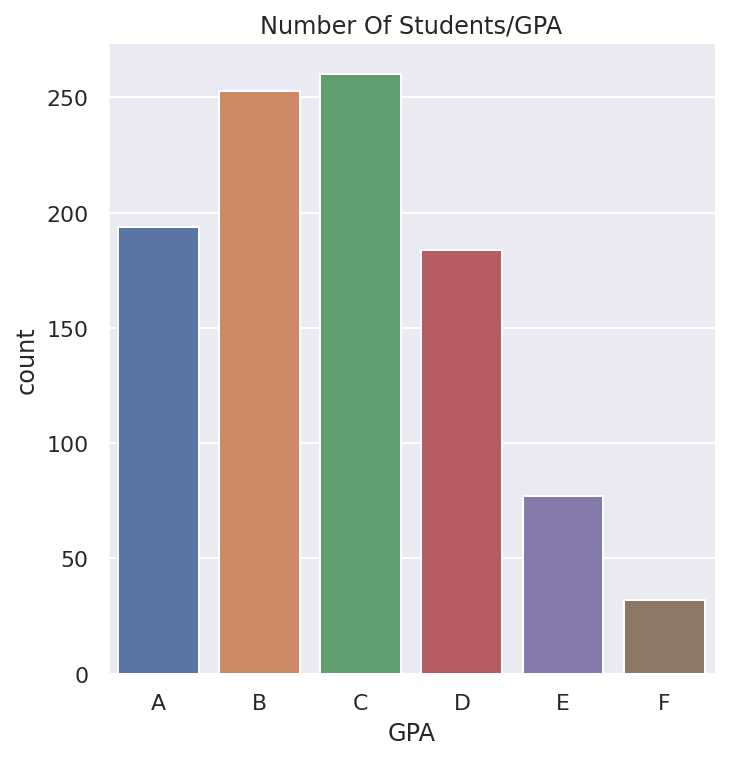

In [106]:
GPA_Order = list("ABCDEF")
sns.catplot(data= data, x= 'GPA',order= GPA_Order, kind= 'count');
plt.title('Number Of Students/GPA');

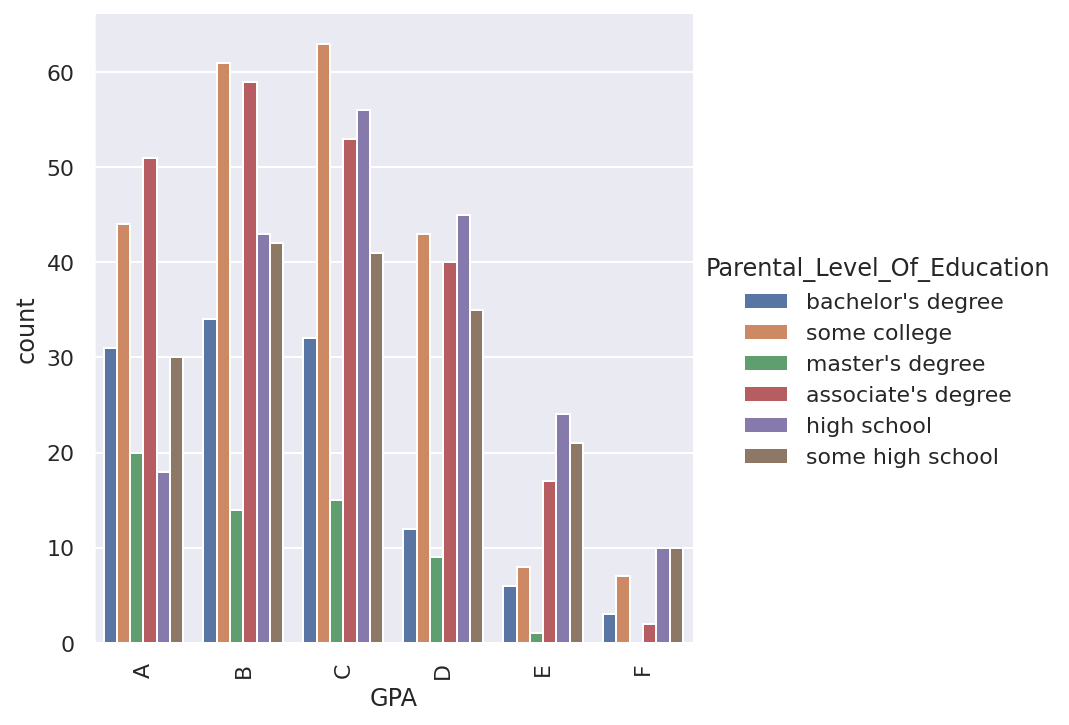

In [107]:
sns.catplot(data= data, hue= 'Parental_Level_Of_Education',
             x= 'GPA', kind='count', order= GPA_Order)
plt.xticks(rotation= 90);

As we sow here when the the parents "`Parental_Level_Of_Education`" get advancied education degree like `Bachelor` or `Master` the children will be more clever and the students will sucess in his\her exams ... And it's a **Positive Correlation**

**If you have any questions, I am ready to answer your questions, and will be happy if you get me feedback for keeping going**.